## 2345월 / 67월 데이터 불러오기 및 전처리

In [114]:
import pandas as pd
import os

os.chdir('P:\\new')

customer_df_2345 = pd.read_csv('./2345_customer.csv')
customer_df_67 = pd.read_csv('./67_customer.csv')

print('2345 shape : ', customer_df_2345.shape)
print('67 shape : ', customer_df_67.shape)


customer_df_2345.head()

2345 shape :  (130549, 29)
67 shape :  (101778, 29)


,insd_usermbr_no,mno_cd,first_prchs_dt,last_prchs_dt,sex_clsf_cd,age_cd,total_prchs_cnt,weekend_prchs_cnt,total_payment_amt,total_cpt_amt,...,wly_prchs_amt_max,wly_prchs_amt_min,wly_prchs_amt_mean,frequency,recency,T,total_buys,dt_step_min,dt_step_max,dt_step_mean
0,IF14210296502009062300092258,US001201,2020-03-29,2020-04-30,M,042,10,2,71330,2370,...,55670,15660,35665.000000,1.0,32.0,63.0,0.0,32.0,32.0,32.0
1,IF142158893220090701150416,US001201,2020-04-11,2020-05-31,F,040,201,105,95,6605,...,95,0,11.875000,36.0,50.0,50.0,0.0,1.0,6.0,1.4
2,IF142158935420090720101940,US001201,2020-03-26,2020-05-31,F,039,25,17,6100,200,...,2200,600,1525.000000,3.0,66.0,66.0,0.0,14.0,36.0,16.5
3,IF1423000039820090904101650,US001201,2020-02-03,2020-05-29,M,045,148,13,298140,30260,...,107135,0,29814.000000,19.0,116.0,118.0,2.0,1.0,40.0,5.8
4,IF1423000044820090904173540,US001201,2020-02-01,2020-05-30,M,052,42,20,132050,10950,...,27900,7200,14672.222222,12.0,119.0,120.0,0.0,1.0,32.0,9.2


In [115]:
cluster = pd.read_csv('./customer_cluster_df.csv', usecols = ['insd_usermbr_no', 'cluster_label'])

In [116]:
customer_df_2345 = customer_df_2345.merge(cluster, on='insd_usermbr_no')
customer_df_67 = customer_df_67.merge(cluster,  on='insd_usermbr_no')

In [120]:
#ZZZ 값 제거
customer_df_2345 = customer_df_2345[customer_df_2345['age_cd'] != 'ZZZ']
customer_df_2345 = customer_df_2345[customer_df_2345['sex_clsf_cd'] != 'Z']

customer_df_67 = customer_df_67[customer_df_67['age_cd'] != 'ZZZ']
customer_df_67 = customer_df_67[customer_df_67['sex_clsf_cd'] != 'Z']



In [121]:
#선호시간 범주형으로 변경
def caltime(x):
    if x in ['02~03' ,'03~04' ,'04~05', '05~06']:
        return 1
    if x in ['06~07' ,'07~08', '08~09' ,'09~10']:
        return 2
    if x in ['10~11' ,'11~12' ,'12~13' ,'13~14']:
        return 3
    if x in ['14~15' ,'15~16' ,'16~17' ,'17~18']:
        return 4
    if x in ['18~19' ,'19~20' ,'20~21' ,'21~22']:
        return 5
    else:
        return 6
    
customer_df_2345['pref_tm'] = customer_df_2345['pref_tm'].apply(caltime)
customer_df_67['pref_tm'] = customer_df_67['pref_tm'].apply(caltime)


In [123]:
#bin_count 변ㅅ수 생성
customer_df_2345['bin_count'] = customer_df_2345['total_buys'].apply(lambda x: 1 if x > 0 else 0) 
customer_df_67['bin_count'] = customer_df_67['total_buys'].apply(lambda x: 1 if x > 0 else 0) 

In [124]:
#sex 컬럼 라벨인코더
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder = encoder.fit(customer_df_2345['sex_clsf_cd'])

customer_df_2345['sex_clsf_cd'] = encoder.transform(customer_df_2345['sex_clsf_cd'])
customer_df_67['sex_clsf_cd'] = encoder.transform(customer_df_67['sex_clsf_cd'])



In [125]:
# #age 컬럼 범주형으로 변경

# customer_df_2345['age_cd'] = customer_df_2345['age_cd'].apply(lambda x:-1 if x=='ZZZ' else x)
# customer_df_2345['age_cd'] = customer_df_2345['age_cd'].astype(float)

# customer_df_67['age_cd'] = customer_df_67['age_cd'].apply(lambda x:-1 if x=='ZZZ' else x)
# customer_df_67['age_cd'] = customer_df_67['age_cd'].astype(float)


# def age(x):
#     if x == -1:
#             return -1
#     else:
#         return (x-x%10)
    
# customer_df_2345['age_cd'] = pd.DataFrame(customer_df_2345['age_cd'].apply(lambda x : age(x)))
# customer_df_67['age_cd'] = pd.DataFrame(customer_df_67['age_cd'].apply(lambda x : age(x)))


In [127]:
#one_hot_decoding = get_dummies()

customer_df_2345 = pd.get_dummies(customer_df_2345, columns=['pref_category', 'mno_cd', 'cluster_label'])

customer_df_67 = pd.get_dummies(customer_df_67, columns=['pref_category', 'mno_cd', 'cluster_label'])

display(customer_df_2345.shape, customer_df_67.shape)

(113098, 45)

(90206, 45)

In [131]:
#필요없는 컬럼 제거
customer_df_2345=customer_df_2345.drop(['insd_usermbr_no', 'first_prchs_dt', 'last_prchs_dt', 'total_buys','pref_dtl_category'],axis=1)
customer_df_67=customer_df_67.drop(['insd_usermbr_no', 'first_prchs_dt', 'last_prchs_dt', 'total_buys','pref_dtl_category'],axis=1)


- customer_df_2345 : train set
- customer_df_67 : test set

## feature 전처리  => log변환

In [133]:
#로그변환 할 feqture
#recency, T 빼고 다 log변환
import numpy as np
log_transfomed_list = ['total_prchs_cnt', 'weekend_prchs_cnt', 'total_payment_amt',
       'total_cpt_amt', 'total_prod_amt', 'dly_prchs_amt_max',
       'dly_prchs_amt_min', 'mly_prchs_amt_min', 'mly_prchs_amt_max',
       'mly_prchs_amt_mean', 'wly_prchs_amt_max', 'wly_prchs_amt_min',
       'wly_prchs_amt_mean', 'frequency', 'dt_step_min', 'dt_step_max', 'dt_step_mean']

for trans in log_transfomed_list:
    customer_df_2345[trans] =  customer_df_2345[trans].apply(lambda x : np.log1p(x))
    customer_df_67[trans] =  customer_df_67[trans].apply(lambda x : np.log1p(x))



- 전처리 끝

In [219]:
# customer_df_2345 = pd.read_csv('./customer_df_2345_final2.csv')
# customer_df_67 = pd.read_csv('./customer_df_67_final2.csv')

In [220]:
#predf_category 컬럼 이름 영문으로 변경

customer_df_2345 = customer_df_2345.rename(columns={'pref_category_만화':'pref_category_cartoon', 'pref_category_오디오북':'pref_category_audio',
       'pref_category_웹소설':'pref_category_web', 'pref_category_웹툰':'pref_category_webtoon', 'pref_category_정액제':'pref_category_sub'})
customer_df_67 =  customer_df_67.rename(columns={'pref_category_만화':'pref_category_cartoon', 'pref_category_오디오북':'pref_category_audio',
       'pref_category_웹소설':'pref_category_web', 'pref_category_웹툰':'pref_category_webtoon', 'pref_category_정액제':'pref_category_sub'})

## Logistic Regression 분석

- train / val/ test set 나누기

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [221]:
x_features_train= customer_df_2345.drop(['bin_count'], axis=1)
y_target_train = customer_df_2345['bin_count']

x_features_test = customer_df_67.drop(['bin_count'], axis=1)
y_target_test = customer_df_67['bin_count']

In [222]:
x_train, x_val, y_train, y_val = train_test_split(x_features_train, y_target_train, test_size=0.2, stratify = y_target_train,random_state=0)

x_test = x_features_test
y_test = y_target_test

In [223]:
display('train_shape',x_train.shape, y_train.shape)
display('val_shape', x_val.shape, y_val.shape)
display('test_shape', x_test.shape, y_test.shape)

'train_shape'

(90478, 39)

(90478,)

'val_shape'

(22620, 39)

(22620,)

'test_shape'

(90206, 39)

(90206,)

## 학습

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve

import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [102]:
def get_clf_eval(y_test, pred=None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [103]:
def roc_curve_plot(y_test, pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
    plt.legend()
    


In [104]:
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

# training model
training accuracy: 0.8239
[[50710  7380]
 [ 8556 23832]]
# validation model
validation accuracy: 0.8242
[[12667  1856]
 [ 2120  5977]]
# test model
test accuracy: 0.8261
[[54565  7991]
 [ 7699 19951]]
 #train VS val
오차 행렬
[[12667  1856]
 [ 2120  5977]]
정확도: 0.8242, 정밀도: 0.7631, 재현율: 0.7382, F1: 0.7504, AUC: 0.8988
# train VS test
오차 행렬
[[54565  7991]
 [ 7699 19951]]
정확도: 0.8261, 정밀도: 0.7140, 재현율: 0.7216, F1: 0.7178, AUC: 0.8928


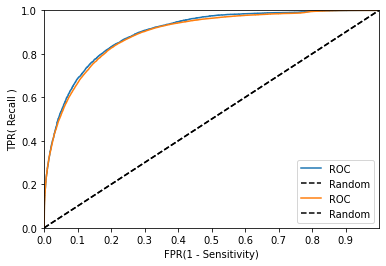

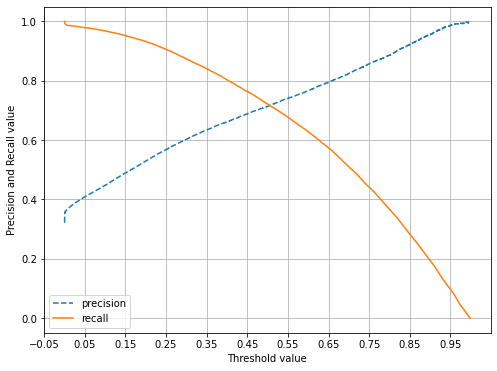

In [224]:
#로지스틱 회귀를 이용해 학습 및 val 예측
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred_proba = lr_clf.predict_proba(x_val)
lr_pred_val = lr_clf.predict(x_val)

#train 모델 정확도
print('# training model')
lr_pred_train = lr_clf.predict(x_train)
print('training accuracy: {0:.4f}'.format(accuracy_score(y_train, lr_pred_train)))
print(confusion_matrix(y_train, lr_pred_train))

#validation 모델 정확도
print('# validation model')
lr_pred_val = lr_clf.predict(x_val)
print('validation accuracy: {0:.4f}'.format(accuracy_score(y_val, lr_pred_val)))
print(confusion_matrix(y_val, lr_pred_val))

#test 모델 정확도
print('# test model')
lr_pred_test = lr_clf.predict(x_test)
print('test accuracy: {0:.4f}'.format(accuracy_score(y_test, lr_pred_test)))
print(confusion_matrix(y_test, lr_pred_test))


#validation set 평가
print('=========================================================================')
print(' #train VS val')
get_clf_eval(y_val, lr_pred_val, lr_pred_proba[:,1])
roc_curve_plot(y_val, lr_pred_proba[:, 1])

#test set 평가
lr_pred_proba_test = lr_clf.predict_proba(x_test)
lr_pred_test = lr_clf.predict(x_test)

print('=========================================================================')
print('# train VS test')
get_clf_eval(y_test, lr_pred_test, lr_pred_proba_test[:,1])
roc_curve_plot(y_test, lr_pred_proba_test[:, 1])

precision_recall_curve_plot(y_test, lr_pred_proba_test[:,1])

In [225]:
import timeit
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ['l1', 'l2'],
            'C' : [0.001, 0.01, 0.05, 0.1,0.3, 0.5,0.8,  1,2, 3, 5, 8, 10,20,50,100] }

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=5, refit = True, n_jobs=-1)

start_time = timeit.default_timer() # 시작 시간 체크
grid_clf.fit(x_train, y_train)
terminate_time = timeit.default_timer() # 종료 시간 체크  

print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))
print("%f초 걸렸습니다." % (terminate_time - start_time)) 

scores_df = pd.DataFrame(grid_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score']].sort_values(by='rank_test_score')

최적 하이퍼 파라미터 :{'C': 0.05, 'penalty': 'l2'}, 최적 평균 정확도 : 0.823
27.731425초 걸렸습니다.


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score
5,"{'C': 0.05, 'penalty': 'l2'}",0.823316,1,0.824215,0.823663,0.817142,0.827356
3,"{'C': 0.01, 'penalty': 'l2'}",0.823117,2,0.828747,0.816866,0.818523,0.825200
31,"{'C': 100, 'penalty': 'l2'}",0.823106,3,0.825984,0.823276,0.816589,0.823653
1,"{'C': 0.001, 'penalty': 'l2'}",0.823062,4,0.824326,0.818081,0.821176,0.826803
17,"{'C': 2, 'penalty': 'l2'}",0.822951,5,0.825707,0.821673,0.819076,0.826029
15,"{'C': 1, 'penalty': 'l2'}",0.822587,6,0.824823,0.820900,0.817142,0.824813
19,"{'C': 3, 'penalty': 'l2'}",0.822543,7,0.825044,0.819960,0.820402,0.824427
27,"{'C': 20, 'penalty': 'l2'}",0.822465,8,0.825818,0.820789,0.817695,0.822603
25,"{'C': 10, 'penalty': 'l2'}",0.822299,9,0.824989,0.820458,0.818966,0.823156
21,"{'C': 5, 'penalty': 'l2'}",0.822277,10,0.827586,0.816976,0.814766,0.824427


In [226]:
#best_estimator테스트 데이터 평가
lr_estimator = grid_clf.best_estimator_
lr_estimator_pred = lr_estimator.predict(x_test)
lr_estimator_pred_proba = lr_estimator.predict_proba(x_test)

get_clf_eval(y_test, lr_estimator_pred, lr_estimator_pred_proba[:,1])


오차 행렬
[[55856  6700]
 [ 8984 18666]]
정확도: 0.8261, 정밀도: 0.7359, 재현율: 0.6751, F1: 0.7042, AUC: 0.8924


### 멍텅구리
- 이상치 제거 전 => 정확도: 0.8261, 정밀도: 0.7140, 재현율: 0.7216, F1: 0.7178, AUC: 0.8928
- 이상치 제거 후 => 정확도: 0.8249, 정밀도: 0.7598, 재현율: 0.6269, F1: 0.6870, AUC: 0.8876

### grid search 이후 best_estimator
- 이상치 제거 전 => 정확도: 0.8261, 정밀도: 0.7359, 재현율: 0.6751, F1: 0.7042, AUC: 0.8924
- 이상치 제거 후 => 정확도: 0.8230, 정밀도: 0.7056, 재현율: 0.7250, F1: 0.7152, AUC: 0.8943




In [91]:
#멍텅구리
pred = lr_clf.predict(x_test)
accuracy_score(y_test,pred)

0.8248896969159479

In [166]:
#모델 저장
import pickle
import joblib
joblib.dump(lr_estimator, 'lr_estimator.pkl')

['lr_estimator.pkl']

## 이상치 제거 (결국 안했음)

### feature별 상관관계 확인

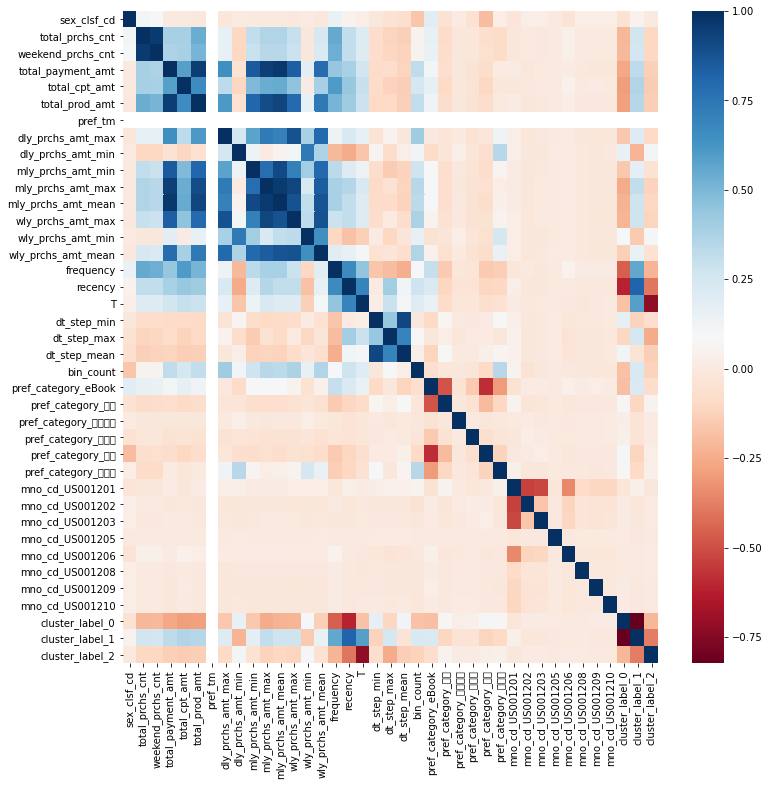

In [37]:
import seaborn as sns

plt.figure(figsize=(12,12))
corr = customer_df_2345.corr()
sns.heatmap(corr, cmap = 'RdBu')

- bin_count(y) 와 dly_prchs_amt_max, wly_prchs_amt_max, wly_prchs_amt_mean, pref_category_정액제의 상관관계 어느정도 확인

In [44]:
import numpy as np

def get_outlier(df=None, column = None, weight=1.5):
    fraud = df[df['bin_count'] == 1][column]
    
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [52]:
outlier_index_dly_prchs_amt_max = get_outlier(df=customer_df_2345, column='dly_prchs_amt_max', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index_dly_prchs_amt_max)
print(outlier_index_dly_prchs_amt_max.value_counts())

이상치 데이터 인덱스: Int64Index([     3,     33,     34,     81,    111,    143,    169,    206,
               224,    235,
            ...
            127234, 127399, 127464, 127670, 128101, 128533, 129290, 129661,
            129804, 130135],
           dtype='int64', length=3010)
59391     1
97617     1
58716     1
102387    1
19620     1
         ..
4793      1
26694     1
8885      1
39604     1
77824     1
Length: 3010, dtype: int64


In [51]:
outlier_index_wly_prchs_amt_max = get_outlier(df=customer_df_2345, column='wly_prchs_amt_max', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index_wly_prchs_amt_max)
print(outlier_index_wly_prchs_amt_max.value_counts())



이상치 데이터 인덱스: Int64Index([     3,     34,     81,    111,    180,    285,    286,    366,
               374,    380,
            ...
            127229, 127234, 127399, 127464, 127670, 128101, 128369, 129290,
            129661, 129804],
           dtype='int64', length=2552)
59391    1
84585    1
54648    1
3447     1
45523    1
        ..
64186    1
4793     1
56275    1
20612    1
34817    1
Length: 2552, dtype: int64


In [53]:
outlier_index_wly_prchs_amt_mean = get_outlier(df=customer_df_2345, column='wly_prchs_amt_mean', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index_wly_prchs_amt_mean)
print(outlier_index_wly_prchs_amt_mean.value_counts())

이상치 데이터 인덱스: Int64Index([     3,     62,    105,    111,    180,    206,    224,    285,
               286,    374,
            ...
            129094, 129166, 129290, 129548, 129661, 129804, 129882, 129973,
            130135, 130147],
           dtype='int64', length=2929)
59391     1
114170    1
77125     1
1348      1
1346      1
         ..
128603    1
8869      1
91224     1
80747     1
92721     1
Length: 2929, dtype: int64


In [55]:
outlier_index_pref_category_정액제 = get_outlier(df=customer_df_2345, column='pref_category_정액제', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index_pref_category_정액제)
print(outlier_index_pref_category_정액제.value_counts())

이상치 데이터 인덱스: Int64Index([    11,     13,     30,     33,     38,     39,     45,     63,
                82,    101,
            ...
            129990, 130000, 130020, 130110, 130129, 130135, 130191, 130303,
            130330, 130409],
           dtype='int64', length=6784)
49376     1
65549     1
11647     1
90086     1
8136      1
         ..
55702     1
82717     1
29943     1
125728    1
49152     1
Length: 6784, dtype: int64


In [111]:
#4개의 인덱스 리스트의 교집합
intersection = list(set(outlier_index_dly_prchs_amt_max)&set(outlier_index_wly_prchs_amt_max)&set(outlier_index_wly_prchs_amt_mean)&set(outlier_index_pref_category_정액제))
print(intersection)
print(len(intersection))

[2050, 12803, 61955, 9221, 34823, 66056, 9736, 104462, 61967, 40465, 2067, 36373, 85525, 13336, 54296, 7707, 99356, 11292, 54302, 65056, 15906, 9255, 14890, 43573, 2614, 15414, 79928, 59964, 102461, 85567, 7232, 1090, 3650, 24130, 11333, 14917, 37448, 51788, 16462, 116814, 3151, 77390, 5710, 50260, 80471, 91224, 101977, 80984, 30813, 45664, 39520, 28258, 4196, 4709, 39013, 32877, 120432, 92282, 64642, 42117, 35461, 8840, 44688, 53904, 119954, 33940, 12444, 68769, 52389, 70309, 91818, 46250, 50349, 66224, 16049, 77490, 107699, 7858, 65718, 12471, 4793, 99514, 68284, 8894, 5310, 38078, 111806, 7879, 42185, 4813, 11982, 62159, 7886, 90837, 65750, 24791, 6357, 49369, 17113, 49371, 6359, 58078, 2783, 39647, 9953, 2786, 118497, 42724, 12514, 15591, 34538, 36074, 39149, 55022, 29941, 12535, 2809, 11515, 79612, 26877, 38143, 27393, 123654, 51464, 57610, 50958, 65807, 89871, 55058, 44825, 50970, 14107, 122652, 286, 11550, 62752, 30494, 87842, 8996, 10021, 72486, 32548, 39723, 7983, 7472, 1841, 

In [132]:
#교집합한 이상치 index 제거
customer_df_2345.drop(intersection, axis=0, inplace=True)

## 개별 model 불러오기

In [174]:
lr_from_joblib = joblib.load('lr_estimator.pkl')
lr_pred = lr_from_joblib.predict(x_test)
lr_pred_proba = lr_from_joblib.predict_proba(x_test)

lgbm_from_joblib = joblib.load('lgbm_estimator.pkl')
lgbm_pred = lgbm_from_joblib.predict(x_test)
lgbm_pred_proba = lgbm_from_joblib.predict_proba(x_test)

rf_from_joblib = joblib.load('rf_estimator.pkl')
rf_pred = rf_from_joblib.predict(x_test)
rf_pred_proba = rf_from_joblib.predict_proba(x_test)

catboost_from_joblib = joblib.load('catboost_estimator.pkl')
catboost_pred = catboost_from_joblib.predict(x_test)
catboost_pred_proba = catboost_from_joblib.predict_proba(x_test)

# roc_curve_plot(y_test, lr_pred_proba_test[:, 1])


### 개별 모델별로 점수 평가

오차 행렬
[[55856  6700]
 [ 8984 18666]]
정확도: 0.8261, 정밀도: 0.7359, 재현율: 0.6751, F1: 0.7042, AUC: 0.8924


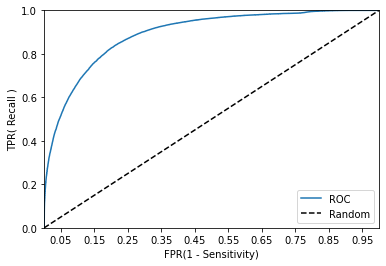

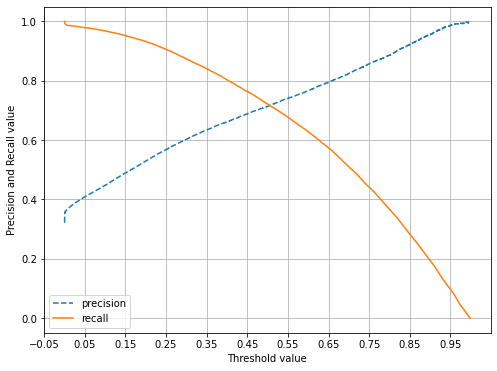

In [215]:
get_clf_eval(y_test, lr_pred, lr_pred_proba[:,1])
roc_curve_plot(y_test, lr_pred_proba_test[:, 1])
precision_recall_curve_plot(y_test, lr_pred_proba_test[:,1])

오차 행렬
[[56101  6455]
 [ 5972 21678]]
정확도: 0.8622, 정밀도: 0.7706, 재현율: 0.7840, F1: 0.7772, AUC: 0.9326


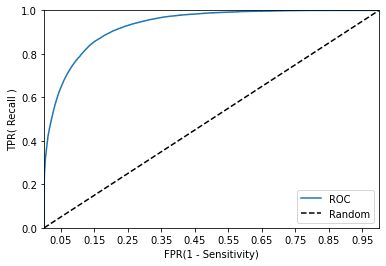

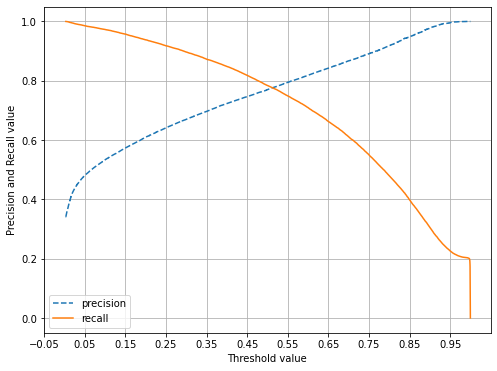

In [183]:
get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba[:,1])
roc_curve_plot(y_test, lgbm_pred_proba[:, 1])
precision_recall_curve_plot(y_test, lgbm_pred_proba[:,1])

오차 행렬
[[56405  6151]
 [ 6160 21490]]
정확도: 0.8635, 정밀도: 0.7775, 재현율: 0.7772, F1: 0.7773, AUC: 0.9315


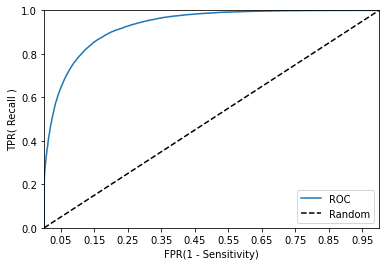

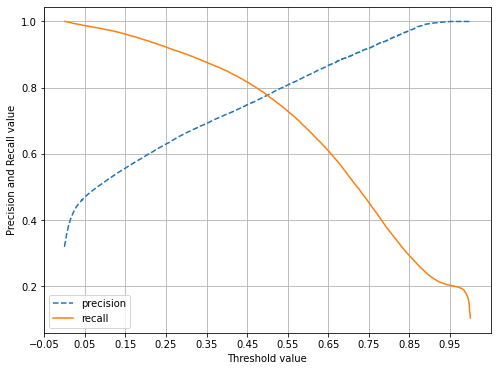

In [182]:
get_clf_eval(y_test, rf_pred, rf_pred_proba[:,1])
roc_curve_plot(y_test, rf_pred_proba[:, 1])
precision_recall_curve_plot(y_test, rf_pred_proba[:,1])

오차 행렬
[[56600  5956]
 [ 6140 21510]]
정확도: 0.8659, 정밀도: 0.7832, 재현율: 0.7779, F1: 0.7805, AUC: 0.9333


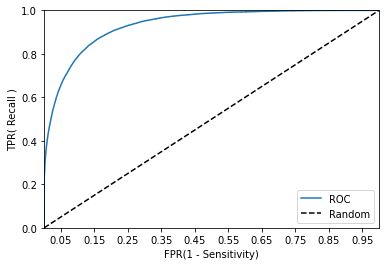

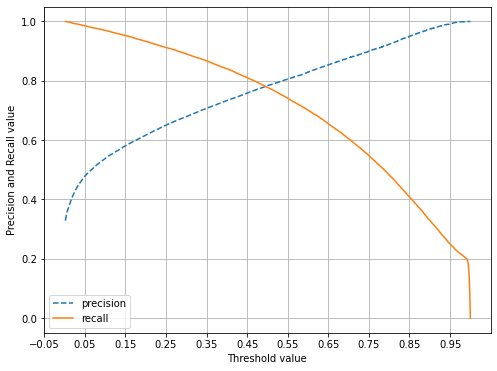

In [181]:
get_clf_eval(y_test, catboost_pred, catboost_pred_proba[:,1])
roc_curve_plot(y_test, catboost_pred_proba[:, 1])
precision_recall_curve_plot(y_test, catboost_pred_proba[:,1])

## Ensemble 모델!


In [208]:
classifiers = [lr_clf, rf_clf, catboost_clf, lgbm_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.8261
RandomForestClassifier 정확도 : 0.8636
0:	learn: 0.6114849	total: 20.1ms	remaining: 20.1s
1:	learn: 0.5562534	total: 37.8ms	remaining: 18.8s
2:	learn: 0.5111611	total: 56ms	remaining: 18.6s
3:	learn: 0.4824760	total: 73.6ms	remaining: 18.3s
4:	learn: 0.4593777	total: 92.7ms	remaining: 18.4s
5:	learn: 0.4381648	total: 111ms	remaining: 18.4s
6:	learn: 0.4240314	total: 135ms	remaining: 19.2s
7:	learn: 0.4134586	total: 163ms	remaining: 20.2s
8:	learn: 0.4054038	total: 191ms	remaining: 21s
9:	learn: 0.3975016	total: 213ms	remaining: 21.1s
10:	learn: 0.3886024	total: 239ms	remaining: 21.5s
11:	learn: 0.3835359	total: 265ms	remaining: 21.8s
12:	learn: 0.3786340	total: 287ms	remaining: 21.8s
13:	learn: 0.3752148	total: 311ms	remaining: 21.9s
14:	learn: 0.3717139	total: 338ms	remaining: 22.2s
15:	learn: 0.3685844	total: 365ms	remaining: 22.5s
16:	learn: 0.3666059	total: 389ms	remaining: 22.5s
17:	learn: 0.3633374	total: 414ms	remaining: 22.6s
18:	learn: 0.3611731	to

160:	learn: 0.3098982	total: 3.72s	remaining: 19.4s
161:	learn: 0.3097741	total: 3.75s	remaining: 19.4s
162:	learn: 0.3095659	total: 3.78s	remaining: 19.4s
163:	learn: 0.3094330	total: 3.8s	remaining: 19.4s
164:	learn: 0.3092962	total: 3.83s	remaining: 19.4s
165:	learn: 0.3091607	total: 3.85s	remaining: 19.3s
166:	learn: 0.3090274	total: 3.87s	remaining: 19.3s
167:	learn: 0.3088881	total: 3.89s	remaining: 19.2s
168:	learn: 0.3084442	total: 3.91s	remaining: 19.2s
169:	learn: 0.3082630	total: 3.93s	remaining: 19.2s
170:	learn: 0.3080876	total: 3.96s	remaining: 19.2s
171:	learn: 0.3079595	total: 4s	remaining: 19.2s
172:	learn: 0.3078237	total: 4.02s	remaining: 19.2s
173:	learn: 0.3077295	total: 4.04s	remaining: 19.2s
174:	learn: 0.3076543	total: 4.06s	remaining: 19.1s
175:	learn: 0.3075077	total: 4.08s	remaining: 19.1s
176:	learn: 0.3074239	total: 4.1s	remaining: 19.1s
177:	learn: 0.3072646	total: 4.13s	remaining: 19.1s
178:	learn: 0.3071308	total: 4.16s	remaining: 19.1s
179:	learn: 0.307

324:	learn: 0.2923610	total: 7.47s	remaining: 15.5s
325:	learn: 0.2922802	total: 7.49s	remaining: 15.5s
326:	learn: 0.2921905	total: 7.52s	remaining: 15.5s
327:	learn: 0.2921467	total: 7.54s	remaining: 15.4s
328:	learn: 0.2920569	total: 7.55s	remaining: 15.4s
329:	learn: 0.2919439	total: 7.58s	remaining: 15.4s
330:	learn: 0.2917964	total: 7.6s	remaining: 15.4s
331:	learn: 0.2917481	total: 7.62s	remaining: 15.3s
332:	learn: 0.2916693	total: 7.63s	remaining: 15.3s
333:	learn: 0.2916018	total: 7.66s	remaining: 15.3s
334:	learn: 0.2914857	total: 7.68s	remaining: 15.2s
335:	learn: 0.2914306	total: 7.71s	remaining: 15.2s
336:	learn: 0.2913462	total: 7.73s	remaining: 15.2s
337:	learn: 0.2912550	total: 7.75s	remaining: 15.2s
338:	learn: 0.2911681	total: 7.77s	remaining: 15.1s
339:	learn: 0.2911017	total: 7.79s	remaining: 15.1s
340:	learn: 0.2910521	total: 7.8s	remaining: 15.1s
341:	learn: 0.2909862	total: 7.82s	remaining: 15s
342:	learn: 0.2909096	total: 7.84s	remaining: 15s
343:	learn: 0.2908

487:	learn: 0.2796257	total: 11.1s	remaining: 11.7s
488:	learn: 0.2795771	total: 11.2s	remaining: 11.7s
489:	learn: 0.2795049	total: 11.2s	remaining: 11.6s
490:	learn: 0.2794213	total: 11.2s	remaining: 11.6s
491:	learn: 0.2793418	total: 11.2s	remaining: 11.6s
492:	learn: 0.2792793	total: 11.3s	remaining: 11.6s
493:	learn: 0.2792502	total: 11.3s	remaining: 11.6s
494:	learn: 0.2791832	total: 11.3s	remaining: 11.5s
495:	learn: 0.2791003	total: 11.3s	remaining: 11.5s
496:	learn: 0.2790011	total: 11.4s	remaining: 11.5s
497:	learn: 0.2789237	total: 11.4s	remaining: 11.5s
498:	learn: 0.2788467	total: 11.4s	remaining: 11.4s
499:	learn: 0.2788156	total: 11.4s	remaining: 11.4s
500:	learn: 0.2787644	total: 11.4s	remaining: 11.4s
501:	learn: 0.2786828	total: 11.5s	remaining: 11.4s
502:	learn: 0.2785889	total: 11.5s	remaining: 11.4s
503:	learn: 0.2785345	total: 11.5s	remaining: 11.3s
504:	learn: 0.2784734	total: 11.6s	remaining: 11.3s
505:	learn: 0.2784291	total: 11.6s	remaining: 11.3s
506:	learn: 

647:	learn: 0.2690282	total: 14.8s	remaining: 8.03s
648:	learn: 0.2689718	total: 14.8s	remaining: 8s
649:	learn: 0.2689387	total: 14.8s	remaining: 7.98s
650:	learn: 0.2688679	total: 14.8s	remaining: 7.96s
651:	learn: 0.2688213	total: 14.9s	remaining: 7.93s
652:	learn: 0.2687312	total: 14.9s	remaining: 7.91s
653:	learn: 0.2686719	total: 14.9s	remaining: 7.89s
654:	learn: 0.2685937	total: 14.9s	remaining: 7.86s
655:	learn: 0.2685376	total: 14.9s	remaining: 7.84s
656:	learn: 0.2684515	total: 15s	remaining: 7.82s
657:	learn: 0.2684155	total: 15s	remaining: 7.79s
658:	learn: 0.2683276	total: 15s	remaining: 7.77s
659:	learn: 0.2682479	total: 15s	remaining: 7.75s
660:	learn: 0.2682229	total: 15.1s	remaining: 7.72s
661:	learn: 0.2681675	total: 15.1s	remaining: 7.7s
662:	learn: 0.2681290	total: 15.1s	remaining: 7.68s
663:	learn: 0.2680423	total: 15.1s	remaining: 7.66s
664:	learn: 0.2680179	total: 15.2s	remaining: 7.63s
665:	learn: 0.2679663	total: 15.2s	remaining: 7.61s
666:	learn: 0.2678829	to

808:	learn: 0.2587784	total: 19.1s	remaining: 4.51s
809:	learn: 0.2587053	total: 19.2s	remaining: 4.5s
810:	learn: 0.2586617	total: 19.2s	remaining: 4.47s
811:	learn: 0.2585932	total: 19.2s	remaining: 4.45s
812:	learn: 0.2585301	total: 19.3s	remaining: 4.43s
813:	learn: 0.2584511	total: 19.3s	remaining: 4.41s
814:	learn: 0.2583965	total: 19.3s	remaining: 4.38s
815:	learn: 0.2583311	total: 19.3s	remaining: 4.36s
816:	learn: 0.2582722	total: 19.4s	remaining: 4.34s
817:	learn: 0.2581911	total: 19.4s	remaining: 4.32s
818:	learn: 0.2581093	total: 19.4s	remaining: 4.29s
819:	learn: 0.2580465	total: 19.5s	remaining: 4.27s
820:	learn: 0.2579809	total: 19.5s	remaining: 4.25s
821:	learn: 0.2579267	total: 19.5s	remaining: 4.23s
822:	learn: 0.2578483	total: 19.6s	remaining: 4.21s
823:	learn: 0.2577843	total: 19.6s	remaining: 4.18s
824:	learn: 0.2577395	total: 19.6s	remaining: 4.16s
825:	learn: 0.2576791	total: 19.7s	remaining: 4.14s
826:	learn: 0.2576414	total: 19.7s	remaining: 4.12s
827:	learn: 0

968:	learn: 0.2500869	total: 24s	remaining: 768ms
969:	learn: 0.2500233	total: 24.1s	remaining: 744ms
970:	learn: 0.2499634	total: 24.1s	remaining: 719ms
971:	learn: 0.2499076	total: 24.1s	remaining: 695ms
972:	learn: 0.2498458	total: 24.1s	remaining: 670ms
973:	learn: 0.2498020	total: 24.2s	remaining: 645ms
974:	learn: 0.2497471	total: 24.2s	remaining: 620ms
975:	learn: 0.2497036	total: 24.2s	remaining: 596ms
976:	learn: 0.2496611	total: 24.3s	remaining: 571ms
977:	learn: 0.2496051	total: 24.3s	remaining: 547ms
978:	learn: 0.2495632	total: 24.4s	remaining: 522ms
979:	learn: 0.2494976	total: 24.4s	remaining: 497ms
980:	learn: 0.2494490	total: 24.4s	remaining: 473ms
981:	learn: 0.2494138	total: 24.4s	remaining: 448ms
982:	learn: 0.2493527	total: 24.4s	remaining: 423ms
983:	learn: 0.2493165	total: 24.5s	remaining: 398ms
984:	learn: 0.2492510	total: 24.5s	remaining: 373ms
985:	learn: 0.2491875	total: 24.5s	remaining: 348ms
986:	learn: 0.2491476	total: 24.6s	remaining: 324ms
987:	learn: 0.

- LR 정확도 : 0.8261
- RF 정확도 : 0.8636
- Catboost 정확도 : 0.8642
- LGBM 정확도 : 0.8636

=> 최종 voting 정확도 : 0.862770

## soft voting


0:	learn: 0.6114849	total: 24.6ms	remaining: 24.6s
1:	learn: 0.5562534	total: 44.6ms	remaining: 22.3s
2:	learn: 0.5111611	total: 64.2ms	remaining: 21.3s
3:	learn: 0.4824760	total: 83.7ms	remaining: 20.8s
4:	learn: 0.4593777	total: 106ms	remaining: 21.1s
5:	learn: 0.4381648	total: 125ms	remaining: 20.7s
6:	learn: 0.4240314	total: 149ms	remaining: 21.1s
7:	learn: 0.4134586	total: 170ms	remaining: 21.1s
8:	learn: 0.4054038	total: 192ms	remaining: 21.2s
9:	learn: 0.3975016	total: 220ms	remaining: 21.8s
10:	learn: 0.3886024	total: 247ms	remaining: 22.2s
11:	learn: 0.3835359	total: 278ms	remaining: 22.9s
12:	learn: 0.3786340	total: 303ms	remaining: 23s
13:	learn: 0.3752148	total: 332ms	remaining: 23.4s
14:	learn: 0.3717139	total: 359ms	remaining: 23.6s
15:	learn: 0.3685844	total: 386ms	remaining: 23.7s
16:	learn: 0.3666059	total: 413ms	remaining: 23.9s
17:	learn: 0.3633374	total: 439ms	remaining: 23.9s
18:	learn: 0.3611731	total: 463ms	remaining: 23.9s
19:	learn: 0.3596626	total: 491ms	remai

164:	learn: 0.3092962	total: 4.31s	remaining: 21.8s
165:	learn: 0.3091607	total: 4.33s	remaining: 21.8s
166:	learn: 0.3090274	total: 4.36s	remaining: 21.7s
167:	learn: 0.3088881	total: 4.38s	remaining: 21.7s
168:	learn: 0.3084442	total: 4.41s	remaining: 21.7s
169:	learn: 0.3082630	total: 4.43s	remaining: 21.6s
170:	learn: 0.3080876	total: 4.46s	remaining: 21.6s
171:	learn: 0.3079595	total: 4.49s	remaining: 21.6s
172:	learn: 0.3078237	total: 4.51s	remaining: 21.6s
173:	learn: 0.3077295	total: 4.54s	remaining: 21.6s
174:	learn: 0.3076543	total: 4.57s	remaining: 21.5s
175:	learn: 0.3075077	total: 4.6s	remaining: 21.5s
176:	learn: 0.3074239	total: 4.62s	remaining: 21.5s
177:	learn: 0.3072646	total: 4.65s	remaining: 21.5s
178:	learn: 0.3071308	total: 4.67s	remaining: 21.4s
179:	learn: 0.3070698	total: 4.69s	remaining: 21.4s
180:	learn: 0.3068135	total: 4.71s	remaining: 21.3s
181:	learn: 0.3066701	total: 4.74s	remaining: 21.3s
182:	learn: 0.3064553	total: 4.77s	remaining: 21.3s
183:	learn: 0

328:	learn: 0.2920569	total: 8.38s	remaining: 17.1s
329:	learn: 0.2919439	total: 8.41s	remaining: 17.1s
330:	learn: 0.2917964	total: 8.45s	remaining: 17.1s
331:	learn: 0.2917481	total: 8.47s	remaining: 17.1s
332:	learn: 0.2916693	total: 8.51s	remaining: 17s
333:	learn: 0.2916018	total: 8.53s	remaining: 17s
334:	learn: 0.2914857	total: 8.58s	remaining: 17s
335:	learn: 0.2914306	total: 8.62s	remaining: 17s
336:	learn: 0.2913462	total: 8.64s	remaining: 17s
337:	learn: 0.2912550	total: 8.67s	remaining: 17s
338:	learn: 0.2911681	total: 8.7s	remaining: 17s
339:	learn: 0.2911017	total: 8.72s	remaining: 16.9s
340:	learn: 0.2910521	total: 8.75s	remaining: 16.9s
341:	learn: 0.2909862	total: 8.78s	remaining: 16.9s
342:	learn: 0.2909096	total: 8.81s	remaining: 16.9s
343:	learn: 0.2908040	total: 8.84s	remaining: 16.9s
344:	learn: 0.2907174	total: 8.87s	remaining: 16.8s
345:	learn: 0.2906376	total: 8.9s	remaining: 16.8s
346:	learn: 0.2906029	total: 8.92s	remaining: 16.8s
347:	learn: 0.2904890	total:

487:	learn: 0.2796257	total: 12.7s	remaining: 13.3s
488:	learn: 0.2795771	total: 12.8s	remaining: 13.3s
489:	learn: 0.2795049	total: 12.8s	remaining: 13.3s
490:	learn: 0.2794213	total: 12.8s	remaining: 13.3s
491:	learn: 0.2793418	total: 12.8s	remaining: 13.2s
492:	learn: 0.2792793	total: 12.8s	remaining: 13.2s
493:	learn: 0.2792502	total: 12.9s	remaining: 13.2s
494:	learn: 0.2791832	total: 12.9s	remaining: 13.1s
495:	learn: 0.2791003	total: 12.9s	remaining: 13.1s
496:	learn: 0.2790011	total: 12.9s	remaining: 13.1s
497:	learn: 0.2789237	total: 13s	remaining: 13.1s
498:	learn: 0.2788467	total: 13s	remaining: 13s
499:	learn: 0.2788156	total: 13s	remaining: 13s
500:	learn: 0.2787644	total: 13s	remaining: 13s
501:	learn: 0.2786828	total: 13.1s	remaining: 12.9s
502:	learn: 0.2785889	total: 13.1s	remaining: 12.9s
503:	learn: 0.2785345	total: 13.1s	remaining: 12.9s
504:	learn: 0.2784734	total: 13.1s	remaining: 12.9s
505:	learn: 0.2784291	total: 13.1s	remaining: 12.8s
506:	learn: 0.2783410	tota

650:	learn: 0.2688679	total: 16.7s	remaining: 8.93s
651:	learn: 0.2688213	total: 16.7s	remaining: 8.91s
652:	learn: 0.2687312	total: 16.7s	remaining: 8.89s
653:	learn: 0.2686719	total: 16.7s	remaining: 8.86s
654:	learn: 0.2685937	total: 16.8s	remaining: 8.83s
655:	learn: 0.2685376	total: 16.8s	remaining: 8.8s
656:	learn: 0.2684515	total: 16.8s	remaining: 8.78s
657:	learn: 0.2684155	total: 16.8s	remaining: 8.75s
658:	learn: 0.2683276	total: 16.9s	remaining: 8.72s
659:	learn: 0.2682479	total: 16.9s	remaining: 8.7s
660:	learn: 0.2682229	total: 16.9s	remaining: 8.67s
661:	learn: 0.2681675	total: 16.9s	remaining: 8.64s
662:	learn: 0.2681290	total: 17s	remaining: 8.62s
663:	learn: 0.2680423	total: 17s	remaining: 8.59s
664:	learn: 0.2680179	total: 17s	remaining: 8.56s
665:	learn: 0.2679663	total: 17s	remaining: 8.54s
666:	learn: 0.2678829	total: 17s	remaining: 8.51s
667:	learn: 0.2678328	total: 17.1s	remaining: 8.48s
668:	learn: 0.2677300	total: 17.1s	remaining: 8.46s
669:	learn: 0.2676745	to

810:	learn: 0.2586617	total: 20.9s	remaining: 4.86s
811:	learn: 0.2585932	total: 20.9s	remaining: 4.83s
812:	learn: 0.2585301	total: 20.9s	remaining: 4.81s
813:	learn: 0.2584511	total: 20.9s	remaining: 4.78s
814:	learn: 0.2583965	total: 21s	remaining: 4.76s
815:	learn: 0.2583311	total: 21s	remaining: 4.73s
816:	learn: 0.2582722	total: 21s	remaining: 4.71s
817:	learn: 0.2581911	total: 21s	remaining: 4.68s
818:	learn: 0.2581093	total: 21.1s	remaining: 4.66s
819:	learn: 0.2580465	total: 21.1s	remaining: 4.63s
820:	learn: 0.2579809	total: 21.1s	remaining: 4.6s
821:	learn: 0.2579267	total: 21.1s	remaining: 4.58s
822:	learn: 0.2578483	total: 21.2s	remaining: 4.55s
823:	learn: 0.2577843	total: 21.2s	remaining: 4.53s
824:	learn: 0.2577395	total: 21.2s	remaining: 4.5s
825:	learn: 0.2576791	total: 21.2s	remaining: 4.47s
826:	learn: 0.2576414	total: 21.3s	remaining: 4.45s
827:	learn: 0.2575929	total: 21.3s	remaining: 4.42s
828:	learn: 0.2575633	total: 21.3s	remaining: 4.4s
829:	learn: 0.2574692	t

976:	learn: 0.2496611	total: 25.2s	remaining: 594ms
977:	learn: 0.2496051	total: 25.2s	remaining: 568ms
978:	learn: 0.2495632	total: 25.3s	remaining: 542ms
979:	learn: 0.2494976	total: 25.3s	remaining: 516ms
980:	learn: 0.2494490	total: 25.3s	remaining: 490ms
981:	learn: 0.2494138	total: 25.3s	remaining: 464ms
982:	learn: 0.2493527	total: 25.4s	remaining: 439ms
983:	learn: 0.2493165	total: 25.4s	remaining: 413ms
984:	learn: 0.2492510	total: 25.4s	remaining: 387ms
985:	learn: 0.2491875	total: 25.4s	remaining: 361ms
986:	learn: 0.2491476	total: 25.4s	remaining: 335ms
987:	learn: 0.2490940	total: 25.5s	remaining: 309ms
988:	learn: 0.2490322	total: 25.5s	remaining: 284ms
989:	learn: 0.2489805	total: 25.5s	remaining: 258ms
990:	learn: 0.2489304	total: 25.5s	remaining: 232ms
991:	learn: 0.2488901	total: 25.6s	remaining: 206ms
992:	learn: 0.2487829	total: 25.6s	remaining: 180ms
993:	learn: 0.2487127	total: 25.6s	remaining: 155ms
994:	learn: 0.2486702	total: 25.6s	remaining: 129ms
995:	learn: 

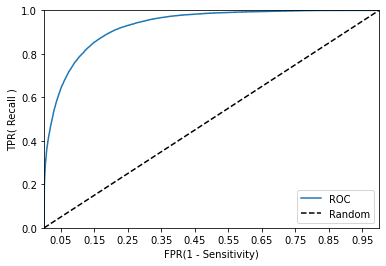

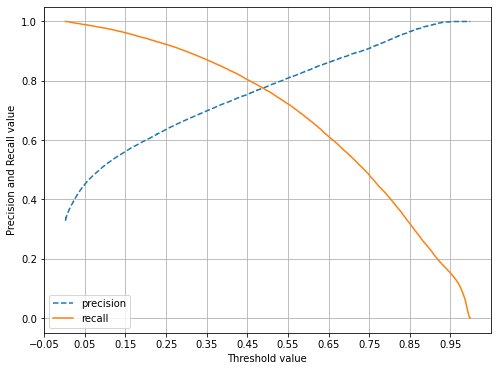

In [212]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

lr_clf = LogisticRegression(C = 0.05, penalty = 'l2')
rf_clf = RandomForestClassifier(max_depth=15, max_features=0.5, n_estimators=500, n_jobs=-1, random_state=42)
lgbm_clf = LGBMClassifier(colsample_bytree = 0.8, max_depth=10, min_split_gain=0.3, n_estimators=100, num_leaves=100, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20)
catboost_clf = CatBoostClassifier(depth=6, iterations=1000, learning_rate=0.1)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('RF', rf_clf), ('catboost', catboost_clf), ('lgbm', lgbm_clf)], 
                         voting = 'soft')

vo_clf.fit(x_train, y_train)
vo_clf_pred = vo_clf.predict(x_test)
vo_clf_pred_proba = vo_clf.predict_proba

get_clf_eval(y_test, vo_clf_pred, vo_clf_pred_proba[:,1])
roc_curve_plot(y_test, vo_clf_pred_proba[:, 1])
precision_recall_curve_plot(y_test, vo_clf_pred_proba[:,1])


- LR 정확도 : 0.8261
- RF 정확도 : 0.8636
- Catboost 정확도 : 0.8642
- LGBM 정확도 : 0.8636

=> 최종 voting 정확도 : 0.862770

- soft voting 결과
=> 정확도: 0.8628, 정밀도: 0.7818, 재현율: 0.7662, F1: 0.7739, AUC: 0.9311

## hard voting

In [ ]:
def get_clf_eval_for_hard(y_test, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
#     roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'
          .format(accuracy, precision, recall, f1))

In [218]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

lr_clf = LogisticRegression(C = 0.05, penalty = 'l2')
rf_clf = RandomForestClassifier(max_depth=15, max_features=0.5, n_estimators=500, n_jobs=-1, random_state=42)
lgbm_clf = LGBMClassifier(colsample_bytree = 0.8, max_depth=10, min_split_gain=0.3, n_estimators=100, num_leaves=100, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7, subsample_freq=20)
catboost_clf = CatBoostClassifier(depth=6, iterations=1000, learning_rate=0.1)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('RF', rf_clf), ('catboost', catboost_clf), ('lgbm', lgbm_clf)], 
                         voting = 'hard')

vo_clf.fit(x_train, y_train)
vo_clf_pred = vo_clf.predict(x_test)
# vo_clf_pred_proba = vo_clf.predict_proba(x_test)

get_clf_eval_for_hard(y_test, vo_clf_pred)
# roc_curve_plot(y_test, vo_clf_pred_proba[:, 1])
# precision_recall_curve_plot(y_test, vo_clf_pred_proba[:,1])


0:	learn: 0.6114849	total: 26ms	remaining: 26s
1:	learn: 0.5562534	total: 48.2ms	remaining: 24.1s
2:	learn: 0.5111611	total: 70.8ms	remaining: 23.5s
3:	learn: 0.4824760	total: 93.5ms	remaining: 23.3s
4:	learn: 0.4593777	total: 117ms	remaining: 23.3s
5:	learn: 0.4381648	total: 139ms	remaining: 23.1s
6:	learn: 0.4240314	total: 162ms	remaining: 23s
7:	learn: 0.4134586	total: 184ms	remaining: 22.9s
8:	learn: 0.4054038	total: 208ms	remaining: 22.9s
9:	learn: 0.3975016	total: 234ms	remaining: 23.1s
10:	learn: 0.3886024	total: 261ms	remaining: 23.4s
11:	learn: 0.3835359	total: 293ms	remaining: 24.2s
12:	learn: 0.3786340	total: 319ms	remaining: 24.2s
13:	learn: 0.3752148	total: 350ms	remaining: 24.7s
14:	learn: 0.3717139	total: 376ms	remaining: 24.7s
15:	learn: 0.3685844	total: 405ms	remaining: 24.9s
16:	learn: 0.3666059	total: 430ms	remaining: 24.9s
17:	learn: 0.3633374	total: 464ms	remaining: 25.3s
18:	learn: 0.3611731	total: 492ms	remaining: 25.4s
19:	learn: 0.3596626	total: 520ms	remaining

161:	learn: 0.3097741	total: 4.27s	remaining: 22.1s
162:	learn: 0.3095659	total: 4.29s	remaining: 22s
163:	learn: 0.3094330	total: 4.33s	remaining: 22.1s
164:	learn: 0.3092962	total: 4.35s	remaining: 22s
165:	learn: 0.3091607	total: 4.38s	remaining: 22s
166:	learn: 0.3090274	total: 4.4s	remaining: 22s
167:	learn: 0.3088881	total: 4.42s	remaining: 21.9s
168:	learn: 0.3084442	total: 4.45s	remaining: 21.9s
169:	learn: 0.3082630	total: 4.47s	remaining: 21.8s
170:	learn: 0.3080876	total: 4.5s	remaining: 21.8s
171:	learn: 0.3079595	total: 4.53s	remaining: 21.8s
172:	learn: 0.3078237	total: 4.55s	remaining: 21.8s
173:	learn: 0.3077295	total: 4.57s	remaining: 21.7s
174:	learn: 0.3076543	total: 4.59s	remaining: 21.7s
175:	learn: 0.3075077	total: 4.62s	remaining: 21.6s
176:	learn: 0.3074239	total: 4.64s	remaining: 21.6s
177:	learn: 0.3072646	total: 4.66s	remaining: 21.5s
178:	learn: 0.3071308	total: 4.7s	remaining: 21.5s
179:	learn: 0.3070698	total: 4.72s	remaining: 21.5s
180:	learn: 0.3068135	t

326:	learn: 0.2921905	total: 8.37s	remaining: 17.2s
327:	learn: 0.2921467	total: 8.39s	remaining: 17.2s
328:	learn: 0.2920569	total: 8.42s	remaining: 17.2s
329:	learn: 0.2919439	total: 8.45s	remaining: 17.1s
330:	learn: 0.2917964	total: 8.47s	remaining: 17.1s
331:	learn: 0.2917481	total: 8.49s	remaining: 17.1s
332:	learn: 0.2916693	total: 8.51s	remaining: 17.1s
333:	learn: 0.2916018	total: 8.54s	remaining: 17s
334:	learn: 0.2914857	total: 8.56s	remaining: 17s
335:	learn: 0.2914306	total: 8.58s	remaining: 17s
336:	learn: 0.2913462	total: 8.61s	remaining: 16.9s
337:	learn: 0.2912550	total: 8.64s	remaining: 16.9s
338:	learn: 0.2911681	total: 8.66s	remaining: 16.9s
339:	learn: 0.2911017	total: 8.68s	remaining: 16.9s
340:	learn: 0.2910521	total: 8.71s	remaining: 16.8s
341:	learn: 0.2909862	total: 8.73s	remaining: 16.8s
342:	learn: 0.2909096	total: 8.75s	remaining: 16.8s
343:	learn: 0.2908040	total: 8.77s	remaining: 16.7s
344:	learn: 0.2907174	total: 8.81s	remaining: 16.7s
345:	learn: 0.2906

485:	learn: 0.2797942	total: 12.3s	remaining: 13s
486:	learn: 0.2797106	total: 12.3s	remaining: 13s
487:	learn: 0.2796257	total: 12.4s	remaining: 13s
488:	learn: 0.2795771	total: 12.4s	remaining: 12.9s
489:	learn: 0.2795049	total: 12.4s	remaining: 12.9s
490:	learn: 0.2794213	total: 12.4s	remaining: 12.9s
491:	learn: 0.2793418	total: 12.5s	remaining: 12.9s
492:	learn: 0.2792793	total: 12.5s	remaining: 12.8s
493:	learn: 0.2792502	total: 12.5s	remaining: 12.8s
494:	learn: 0.2791832	total: 12.5s	remaining: 12.8s
495:	learn: 0.2791003	total: 12.6s	remaining: 12.8s
496:	learn: 0.2790011	total: 12.6s	remaining: 12.7s
497:	learn: 0.2789237	total: 12.6s	remaining: 12.7s
498:	learn: 0.2788467	total: 12.6s	remaining: 12.7s
499:	learn: 0.2788156	total: 12.7s	remaining: 12.7s
500:	learn: 0.2787644	total: 12.7s	remaining: 12.6s
501:	learn: 0.2786828	total: 12.7s	remaining: 12.6s
502:	learn: 0.2785889	total: 12.7s	remaining: 12.6s
503:	learn: 0.2785345	total: 12.8s	remaining: 12.6s
504:	learn: 0.2784

648:	learn: 0.2689718	total: 16.5s	remaining: 8.91s
649:	learn: 0.2689387	total: 16.5s	remaining: 8.88s
650:	learn: 0.2688679	total: 16.5s	remaining: 8.86s
651:	learn: 0.2688213	total: 16.6s	remaining: 8.84s
652:	learn: 0.2687312	total: 16.6s	remaining: 8.81s
653:	learn: 0.2686719	total: 16.6s	remaining: 8.78s
654:	learn: 0.2685937	total: 16.6s	remaining: 8.76s
655:	learn: 0.2685376	total: 16.6s	remaining: 8.73s
656:	learn: 0.2684515	total: 16.7s	remaining: 8.71s
657:	learn: 0.2684155	total: 16.7s	remaining: 8.68s
658:	learn: 0.2683276	total: 16.7s	remaining: 8.66s
659:	learn: 0.2682479	total: 16.8s	remaining: 8.63s
660:	learn: 0.2682229	total: 16.8s	remaining: 8.61s
661:	learn: 0.2681675	total: 16.8s	remaining: 8.58s
662:	learn: 0.2681290	total: 16.8s	remaining: 8.55s
663:	learn: 0.2680423	total: 16.9s	remaining: 8.53s
664:	learn: 0.2680179	total: 16.9s	remaining: 8.5s
665:	learn: 0.2679663	total: 16.9s	remaining: 8.48s
666:	learn: 0.2678829	total: 16.9s	remaining: 8.46s
667:	learn: 0

807:	learn: 0.2588412	total: 20.5s	remaining: 4.86s
808:	learn: 0.2587784	total: 20.5s	remaining: 4.83s
809:	learn: 0.2587053	total: 20.5s	remaining: 4.81s
810:	learn: 0.2586617	total: 20.5s	remaining: 4.79s
811:	learn: 0.2585932	total: 20.6s	remaining: 4.76s
812:	learn: 0.2585301	total: 20.6s	remaining: 4.73s
813:	learn: 0.2584511	total: 20.6s	remaining: 4.71s
814:	learn: 0.2583965	total: 20.6s	remaining: 4.68s
815:	learn: 0.2583311	total: 20.7s	remaining: 4.66s
816:	learn: 0.2582722	total: 20.7s	remaining: 4.63s
817:	learn: 0.2581911	total: 20.7s	remaining: 4.61s
818:	learn: 0.2581093	total: 20.7s	remaining: 4.58s
819:	learn: 0.2580465	total: 20.8s	remaining: 4.56s
820:	learn: 0.2579809	total: 20.8s	remaining: 4.53s
821:	learn: 0.2579267	total: 20.8s	remaining: 4.5s
822:	learn: 0.2578483	total: 20.8s	remaining: 4.48s
823:	learn: 0.2577843	total: 20.9s	remaining: 4.45s
824:	learn: 0.2577395	total: 20.9s	remaining: 4.43s
825:	learn: 0.2576791	total: 20.9s	remaining: 4.4s
826:	learn: 0.

969:	learn: 0.2500233	total: 24.6s	remaining: 761ms
970:	learn: 0.2499634	total: 24.6s	remaining: 736ms
971:	learn: 0.2499076	total: 24.7s	remaining: 711ms
972:	learn: 0.2498458	total: 24.7s	remaining: 685ms
973:	learn: 0.2498020	total: 24.7s	remaining: 660ms
974:	learn: 0.2497471	total: 24.8s	remaining: 635ms
975:	learn: 0.2497036	total: 24.8s	remaining: 609ms
976:	learn: 0.2496611	total: 24.8s	remaining: 584ms
977:	learn: 0.2496051	total: 24.8s	remaining: 559ms
978:	learn: 0.2495632	total: 24.9s	remaining: 534ms
979:	learn: 0.2494976	total: 24.9s	remaining: 508ms
980:	learn: 0.2494490	total: 24.9s	remaining: 483ms
981:	learn: 0.2494138	total: 25s	remaining: 457ms
982:	learn: 0.2493527	total: 25s	remaining: 432ms
983:	learn: 0.2493165	total: 25s	remaining: 407ms
984:	learn: 0.2492510	total: 25s	remaining: 381ms
985:	learn: 0.2491875	total: 25.1s	remaining: 356ms
986:	learn: 0.2491476	total: 25.1s	remaining: 331ms
987:	learn: 0.2490940	total: 25.1s	remaining: 305ms
988:	learn: 0.249032

- hard voting
=> 정확도: 0.8637, 정밀도: 0.7940, 재현율: 0.7500, F1: 0.7714